<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-Measure-of-Linear-Relationship" data-toc-modified-id="A-Measure-of-Linear-Relationship-1">A Measure of Linear Relationship</a></span><ul class="toc-item"><li><span><a href="#Pearson’s-product-moment-correlation-with-Jupyter-Notebook" data-toc-modified-id="Pearson’s-product-moment-correlation-with-Jupyter-Notebook-1.1">Pearson’s product-moment correlation with Jupyter Notebook</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span><ul class="toc-item"><li><span><a href="#Import-necessary-libraries" data-toc-modified-id="Import-necessary-libraries-2.1">Import necessary libraries</a></span></li></ul></li><li><span><a href="#Finding-the-regression-line-using-linregress" data-toc-modified-id="Finding-the-regression-line-using-linregress-3">Finding the regression line using <code>linregress</code></a></span></li><li><span><a href="#Pearson's-correlation-coefficient" data-toc-modified-id="Pearson's-correlation-coefficient-4">Pearson's correlation coefficient</a></span><ul class="toc-item"><li><span><a href="#For-population-data" data-toc-modified-id="For-population-data-4.1">For population data</a></span></li><li><span><a href="#For-sample-data" data-toc-modified-id="For-sample-data-4.2">For sample data</a></span></li></ul></li><li><span><a href="#Finding-Pearson's-correlation-coefficient" data-toc-modified-id="Finding-Pearson's-correlation-coefficient-5">Finding Pearson's correlation coefficient</a></span><ul class="toc-item"><li><span><a href="#Mathematically-using-Numpy" data-toc-modified-id="Mathematically-using-Numpy-5.1">Mathematically using Numpy</a></span></li><li><span><a href="#Using-scipy.stats.pearsonr" data-toc-modified-id="Using-scipy.stats.pearsonr-5.2">Using <code>scipy.stats.pearsonr</code></a></span></li></ul></li><li><span><a href="#Degree-of-freedom-and-critical-values" data-toc-modified-id="Degree-of-freedom-and-critical-values-6">Degree of freedom and critical values</a></span></li><li><span><a href="#The-least-squares-regression-line" data-toc-modified-id="The-least-squares-regression-line-7">The least-squares regression line</a></span></li><li><span><a href="#The-mean-point-on-the-line-of-best-fit" data-toc-modified-id="The-mean-point-on-the-line-of-best-fit-8">The mean point on the line of best fit</a></span></li><li><span><a href="#Real-life-example" data-toc-modified-id="Real-life-example-9">Real-life example</a></span></li><li><span><a href="#Finding-r-from-more-than-two-arrays" data-toc-modified-id="Finding-r-from-more-than-two-arrays-10">Finding r from more than two arrays</a></span></li><li><span><a href="#Heat-map" data-toc-modified-id="Heat-map-11">Heat map</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12">Conclusion</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-13">Reference</a></span></li></ul></div>

# A Measure of Linear Relationship

## Pearson’s product-moment correlation with Jupyter Notebook

# Introduction

In this article, I use Python to analyze bivariate data using Pearson's product-moment correlation coefficient r, drawing scatter diagrams, lines of best fit and the least-square regression line.
Bivariate data involves two types of related data. Pearson's product-moment correlation coefficient tells you how linearly these two data are related.
We can display the collected data on a scatter plot. The horizontal axis is called the x-axis and we call the coordinate of x-axis the independent variable. The vertical axis is called the y-axis and we call the coordinate of y-axis the dependent variable.

I downloaded the data from this [link](https://stats.oecd.org/Index.aspx?DataSetCode=HOUSE_PRICES).

## Import necessary libraries

In [ ]:
# https://gist.github.com/shinokada/8e24e3f435bdd7be910a544b3687b998 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress
import seaborn as sns; sns.set()

Let's create a sample data.

In [3]:
# https://gist.github.com/shinokada/88da5641103f5b4fc80f8621381ef1a8

In [4]:
data = pd.DataFrame(
    [
        [5,7,12,16,20],
        [4,12,18,21,24]
    ],
    index=['gain','loss'])
data

,0,1,2,3,4
gain,5,7,12,16,20
loss,4,12,18,21,24


We need to transpose the data so that data is categorized by columns. Pandas transpose does not modify the original data.

In [5]:
# https://gist.github.com/shinokada/68e9ee9beb77ef4302148c4bd1d985ac

In [6]:
data_t = data.T
print(data_t)

   gain  loss
0     5     4
1     7    12
2    12    18
3    16    21
4    20    24


We use the Seaborn to create a scatter plot.

In [7]:
# https://gist.github.com/shinokada/c732d107ca5c90b1ec2a33e8504d95a4

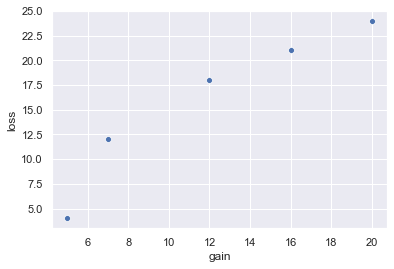

In [13]:
sns.scatterplot(x='gain', y='loss', data=data_t)
plt.show()

# Finding the regression line using `linregress`

`linregress` returns slope, intercept, r_value and p-value.

In [43]:
# https://gist.github.com/shinokada/278a95b2e5dbf61bccbf15ba40f25ed4

In [14]:
df_x=data_t.iloc[:,0] 
df_y=data_t.iloc[:,1]
slope, intercept, r_value, p_value, std_err = linregress(df_x,df_y)

print(f'The equation of reegression line is y={slope:.3f}x+{intercept:.3f}.')
print('Pearson\'s product-moment correlation coefficient is {r_value:.4f}.')
print('p-value is {p_value:.4f}.')

The equation of reegression line is y=1.221x+1.151.
Pearson's product-moment correlation coefficient is {r_value:.4f}.
p-value is {p_value:.4f}.


# Pearson's correlation coefficient

## For population data

Pearson's product-moment correlation coefficient for two sets of population data, x and y, is:

$$
\begin{align}
\rho_{x,y}= \frac{cov(x,y)}{\sigma _x \sigma _y} \tag{1-1}
\end{align}
$$

where cov is the covariance and $\sigma_x$ and $\sigma_y$ are the population standard deviations of x and y.

$$
\begin{align}
cov(x,y)=\frac{1}{n}\sum \limits _{i=1} ^{n} (x_i -\mu _x)(y_i-\mu _y) \tag{1-2}
\end{align}
$$

where $\mu _x$ is the mean of x and $\mu _y$ is the mean of y.

$$
\begin{align}
\sigma_x=\sqrt{\frac{\sum \limits _{i=1} ^{n} (x _i - \mu _x)^2}{n}} \tag{1-3}\\
\sigma_y=\sqrt{\frac{\sum \limits _{i=1} ^{n} (y _i - \mu _y)^2}{n}} \tag{1-4}\\
\end{align}
$$

## For sample data

Pearson's product-moment correlation coefficient for two sets of sample data, x and y, is:

$$
\begin{align}
r_{xy}=\frac{s_{xy}}{s_x s_y} \tag{2-1} \\
\end{align}
$$

where $s_{xy}$ is the covariance and $s_x$ and $s_y$ are the sample standard deviatios of x and y.

$$
\begin{align}
s_{xy}= \sum \limits _{i=1} ^{n} \frac{(x_i -\bar  x)(y_i-\bar y)}{n-1}\tag{2-2} \\
s_x=\sqrt{\frac{\sum \limits _{i=1} ^{n} (x_i - \bar x)^2}{n-1}} \tag{2-3}\\
s_y=\sqrt{\frac{\sum \limits _{i=1} ^{n} (y_i - \bar y)^2}{n-1}}\tag{2-4} \\
\end{align}
$$

Therefore

$$
\begin{align}
r_{xy}=\frac{\sum \limits _{i=1} ^{n}(x _i -\bar x)(y-\bar y)}
{\sqrt{\sum \limits _{i=1} ^{n} (x_i - \bar x)^2} \sqrt{\sum \limits _{i=1} ^{n} (y_i - \bar y)^2}} \tag{2-5}
\end{align}
$$

# Finding Pearson's correlation coefficient 

Let's use sample data.

In [ ]:
# https://gist.github.com/shinokada/dbe2f88096dea97a412ed05eb725adb2

In [16]:
df = pd.DataFrame(
    [
        [5,7,12],
        [4,12,17]
    ],
    index=['gain','loss'])
df

,0,1,2
gain,5,7,12
loss,4,12,17


## Mathematically using Numpy

In [17]:
# https://gist.github.com/shinokada/51ae8c66507b6d0ade544ad132da87e0

In [18]:
# Means
gain_mean, loss_mean=df.T.mean()

# Standard deviations
gain_std, loss_std = df.T.std(ddof=1)

# Covariance
cov_xy=df.T.cov()

# Pearson correlation coefficient
cov_xy.iloc[0,1]/(gain_std*loss_std)


0.93050085576319

In Pandas, `ddf=0` is for population and `ddf=1` is for sample. Since we use all data we use 0 here.

## Using `scipy.stats.pearsonr`

In [19]:
# https://gist.github.com/shinokada/c8a5f8539f4ab466a2f5d1af631b6da4

In [20]:
r, pval = pearsonr(df.T.iloc[:,0],df.T.iloc[:,1])
r

0.9305008557631897

`pearsonr` returns Pearson's product-moment correlation coefficient and p-value.

# Degree of freedom and critical values

You can find the table of critical values for Pearson correlation [here](https://www.statisticssolutions.com/table-of-critical-values-pearson-correlation/). The degree of freedom (dof) is the number of data points minus 2. In the above example dof=5-2=3. For 95% confidence which is statistically significant, we use the 0.05 Levels of Significance from the table of critical value. This gives us 0.878. If |r|>critical value, then the correlation is probably NOT due to change which means it is statistically significant. In the above case, |0.9928| > 0.878, so it is 95% confident that there is a statistically significant positive relationship between two variables.

# The least-squares regression line

The least-squares regression line is called the line of best fit. Since `linregress()` returns the slope and y-intercept, we use them to make a line of regression.

In [21]:
# https://gist.github.com/shinokada/8d299e2e808206f005c34b6589430843

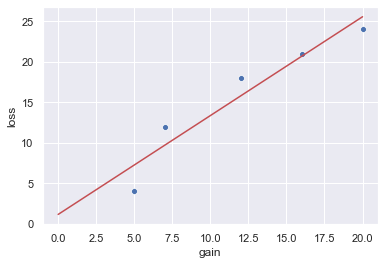

r: {r:.4f}, p-value: {pval:.4f}


In [22]:
X_plot = np.linspace(0,20,100)
Y_plot = slope*X_plot+intercept
sns.scatterplot(x='gain', y='loss', data=data_t)
plt.plot(X_plot, Y_plot, color='r')
plt.show()
r, pval = pearsonr(df_x,df_y)
print('r: {r:.4f}, p-value: {pval:.4f}')

# The mean point on the line of best fit 

We find the mean of each data set and plot it on the same graph.

In [23]:
# https://gist.github.com/shinokada/6126df0b9274ad883471a99f5c9b3da2

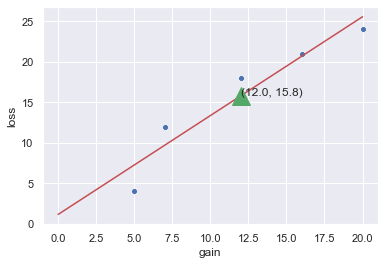

r: {r:.4f}, p-value: {pval:.4f}


In [24]:
gain_mean, loss_mean = data_t.mean(axis = 0)
sns.scatterplot(x='gain', y='loss', data=data_t)
plt.plot(X_plot, Y_plot, color='r')
plt.text(gain_mean, loss_mean, '({}, {})'.format(gain_mean, loss_mean))
plt.plot(gain_mean, loss_mean, 'g^',markersize=18)
plt.show()
r, pval = pearsonr(df_x,df_y)
print('r: {r:.4f}, p-value: {pval:.4f}')

# Real-life example

We are going to the linear relation between the population and labour force in Australia. We use the historical population from [OECD](https://data.oecd.org/). Let's use `read_csv` and find the dimension(shape) and display the first five data using `shape` and `head()`.

In [25]:
# https://gist.github.com/shinokada/9a98be4ca50141896fc6eafd9d16621f

In [26]:
his_pop = pd.read_csv('http://bit.ly/2Szyfzt')
print(his_pop.shape)
print(his_pop.head())

(68208, 11)
  LOCATION    Country SEX    Sex    AGE    Age  TIME  Time       Value  \
0      AUS  Australia   W  Women  TOTAL  Total  2005  2005  10157211.0   
1      AUS  Australia   W  Women  TOTAL  Total  2006  2006  10291542.0   
2      AUS  Australia   W  Women  TOTAL  Total  2007  2007  10473986.0   
3      AUS  Australia   W  Women  TOTAL  Total  2008  2008  10677154.0   
4      AUS  Australia   W  Women  TOTAL  Total  2009  2009  10890856.0   

   Flag Codes  Flags  
0         NaN    NaN  
1         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
4         NaN    NaN  


From the historical population data, let's select Australia. We also need to select Total in the Sex column and TOTAL in the AGE column.

In [27]:
# https://gist.github.com/shinokada/1f215f4fe33b00442bffc48c2ce8e8c0

In [28]:
# Method 1
pop = his_pop.loc[his_pop.Country=='Australia']
pop = pop.loc[pop.Sex =='Total']
pop = pop.loc[pop.AGE =='TOTAL']
pop

,LOCATION,Country,SEX,Sex,AGE,Age,TIME,Time,Value,Flag Codes,Flags
28,AUS,Australia,T,Total,TOTAL,Total,2005,2005,20176844.0,NaN,NaN
29,AUS,Australia,T,Total,TOTAL,Total,2006,2006,20450966.0,NaN,NaN
30,AUS,Australia,T,Total,TOTAL,Total,2007,2007,20827622.0,NaN,NaN
31,AUS,Australia,T,Total,TOTAL,Total,2008,2008,21249199.0,NaN,NaN
32,AUS,Australia,T,Total,TOTAL,Total,2009,2009,21691653.0,NaN,NaN
33,AUS,Australia,T,Total,TOTAL,Total,2010,2010,22031750.0,NaN,NaN
34,AUS,Australia,T,Total,TOTAL,Total,2011,2011,22340024.0,NaN,NaN
35,AUS,Australia,T,Total,TOTAL,Total,2012,2012,22733465.0,NaN,NaN
36,AUS,Australia,T,Total,TOTAL,Total,2013,2013,23128129.0,NaN,NaN
37,AUS,Australia,T,Total,TOTAL,Total,2014,2014,23475686.0,NaN,NaN


We need to select the Value column. I will show you two different ways to do it. [This website](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/) tells you how to use loc and iloc.
Since the Python index starts from 0, it locates in the 8th column.

In [29]:
# https://gist.github.com/shinokada/1489b547260eb3117b5916c9c801d5a8

In [30]:
df_pop = pop.iloc[:,8]
df_pop = df_pop.reset_index(drop=True)
print(df_pop)

0     20176844.0
1     20450966.0
2     20827622.0
3     21249199.0
4     21691653.0
5     22031750.0
6     22340024.0
7     22733465.0
8     23128129.0
9     23475686.0
10    23815995.0
11    24190907.0
12    24601860.0
13    24992860.0
Name: Value, dtype: float64


In the second method, we use `&` logical operator. You can read more details about `loc` and `iloc` in this [article](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html#Aside:-Using-the-Keywords-and/or-Versus-the-Operators-&/|). We select the column where Country is Australia, Set is Total and AGE is TOTAL.

In [31]:
# https://gist.github.com/shinokada/0cb4e679b3764d8c55453637e8c78365

In [32]:
# Method 2
df_pop2 = his_pop[(his_pop.Country=='Australia') & (his_pop.Sex =='Total') & (his_pop.AGE=='TOTAL')]
df_pop2 = df_pop2.iloc[:,8]
df_pop2 = df_pop2.reset_index(drop=True) # reset the index 
print(df_pop2)

0     20176844.0
1     20450966.0
2     20827622.0
3     21249199.0
4     21691653.0
5     22031750.0
6     22340024.0
7     22733465.0
8     23128129.0
9     23475686.0
10    23815995.0
11    24190907.0
12    24601860.0
13    24992860.0
Name: Value, dtype: float64


We need one more data from OECD. The data is the ALFS Labour force. We select data where the Country is Australia. `head()` shows the first 5 data.

In [33]:
# https://gist.github.com/shinokada/955a638657445854c405b0e4760678b8

In [34]:
lab_for = pd.read_csv('http://bit.ly/2UFh1n2')
lab = lab_for[(lab_for.Country=='Australia')]
lab.head()

,LOCATION,Country,SUBJECT,Subject,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,YGTT07L1_ST,Labour force,A,Annual,2005,2005,NaN,NaN,0,Units,NaN,NaN,10404.22,NaN,NaN
1,AUS,Australia,YGTT07L1_ST,Labour force,A,Annual,2006,2006,NaN,NaN,0,Units,NaN,NaN,10632.72,NaN,NaN
2,AUS,Australia,YGTT07L1_ST,Labour force,A,Annual,2007,2007,NaN,NaN,0,Units,NaN,NaN,10911.88,NaN,NaN
3,AUS,Australia,YGTT07L1_ST,Labour force,A,Annual,2008,2008,NaN,NaN,0,Units,NaN,NaN,11205.63,NaN,NaN
4,AUS,Australia,YGTT07L1_ST,Labour force,A,Annual,2009,2009,NaN,NaN,0,Units,NaN,NaN,11441.82,NaN,NaN


We need the Value column which is the 15th index, so we use 14 in `iloc`. Remember that the Python index starts from 0.

In [35]:
# https://gist.github.com/shinokada/cb81d2d5a7b5943b1966546c0d026c07

In [36]:
df_lab = lab.iloc[:,14]
print(df_lab)

0     10404.22
1     10632.72
2     10911.88
3     11205.63
4     11441.82
5     11628.23
6     11814.10
7     11976.40
8     12144.32
9     12286.80
10    12524.53
11    12698.14
12    12977.56
13    13287.70
Name: Value, dtype: float64


We can find Pearson's correlation coefficient from `df_pop` and `df_lab`. `pearsonr` returns `r` and `p-value`.

In [37]:
# https://gist.github.com/shinokada/6fdfbfdbfa120ea73d2af792a5009f14

In [38]:
from scipy.stats import pearsonr
r, pval = pearsonr(df_pop,df_lab)
print(r)
print(pval)

0.9969985602306307
1.0487570962496604e-14


We find the gradient/slope and y-intercept using `linregress`. We create a scatter plot with the Seaborn and Pandas DataFrame. 

In [39]:
# https://gist.github.com/shinokada/eb95e57831ca3898eb1048f0593f6f54

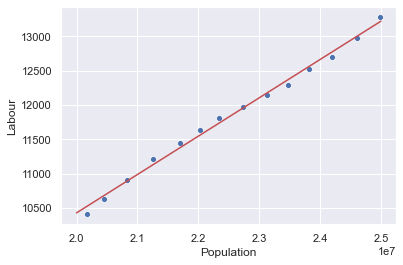

r: {r:.4f}, p-value: {pval:.4f}


In [40]:
d = {'Population':df_pop,'Labour':df_lab}
df = pd.DataFrame(d)

slope, intercept, r_value, p_value, std_err = linregress(df_pop,df_lab)

X_plot = np.linspace(2*10**7,2.5*10**7,5*10**6)
Y_plot = slope*X_plot+intercept
sns.scatterplot(x='Population', y='Labour', data=df)
slope, intercept, r_value, p_value, std_err = linregress(df_pop,df_lab)
plt.plot(X_plot, Y_plot, color='r')
plt.show()
r, pval = pearsonr(df_pop,df_lab)
print('r: {r:.4f}, p-value: {pval:.4f}')

There is a strong positive correlation between the population and the labour force in Australia.

# Finding r from more than two arrays

Sometimes you want to find which pair of data has the strongest linear relationship. You can use `corr()` to find it.

In [41]:
# https://gist.github.com/shinokada/144a703f5d27d372f34187da22ae668b

In [42]:
df = pd.DataFrame({'A': df_x,
                   'B': df_y,
                   'C': [5,6,9,15,20]})
df.corr()

,A,B,C
A,1.000000,0.952816,0.981327
B,0.952816,1.000000,0.889460
C,0.981327,0.889460,1.000000


Please note that Pearson's correlation coefficient of A and B are 0.952816 which is the same as we found it before. In this case, A and C have the strongest linear relationship.

# Heat map

We can use the [Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to draw a [heatmap](https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-2/). Since we have a minimum of 0.88 and a maximum of 1.00 in the previous section, we set `vmax` and `vmin` accordingly. We use `Blues` for the color scheme. 

In [43]:
# https://gist.github.com/shinokada/90835d0d8bd6b5d3ef057cb2aae08b51

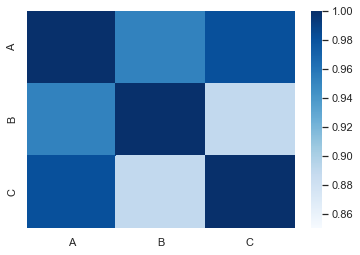

In [44]:
df_corr = df.corr()
sns.heatmap(df_corr, vmax=1.00, vmin=0.85, cmap='Blues')
plt.show()

# Conclusion

By using Python and it's libraries, you can find all necessary data with few lines of code. Also, you can visualize your data easily.

# Reference

- https://data.oecd.org/

- https://www.statisticssolutions.com/table-of-critical-values-pearson-correlation/

- https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-2/

- https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

- https://seaborn.pydata.org/generated/seaborn.heatmap.html

- https://datascienceplus.com/understanding-the-covariance-matrix/